In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import os
import sys
import math

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
PICKLE_PATH = 'dblp_jr_df.pickle'
jr_dblp_df = pd.read_pickle(PICKLE_PATH)

In [3]:
import gc
gc.collect()

0

In [4]:
jr_dblp_df['SJR'] = jr_dblp_df['SJR'].astype(str).str.replace(',', '.') 

In [5]:
jr_dblp_df['SJR'] = pd.to_numeric(jr_dblp_df['SJR'], errors='coerce')

In [6]:
jr_dblp_df.drop(columns=['__id_left', '__id_right'], inplace=True)

In [7]:
jr_dblp_df.isna().sum()

best_match_score           529939
abstract                   530475
authors                         4
id                              0
n_citation                      0
references                 362865
title                           0
venue                           0
year                            0
Rank                       529939
Sourceid                   529939
Title                      529939
Type                       529939
Issn                       529939
SJR                        529939
SJR Best Quartile          529939
H index                    529939
Total Docs. (2017)         529939
Total Docs. (3years)       529939
Total Refs.                529939
Total Cites (3years)       529939
Citable Docs. (3years)     529939
Cites / Doc. (2years)      529939
Ref. / Doc.                529939
Country                    529939
Publisher                 1552746
Categories                 529939
dtype: int64

In [8]:
jr_dblp_df = jr_dblp_df.dropna(subset=['authors'])
jr_dblp_df['references'].fillna('[]', inplace=True)
jr_dblp_df['abstract'].fillna('', inplace=True)

In [9]:
jr_dblp_df['best_match_score'].fillna(0, inplace=True)
jr_dblp_df['Title'].fillna('NoMatch', inplace=True)
jr_dblp_df['Sourceid'].fillna('NoMatch', inplace=True)
jr_dblp_df['Rank'].fillna(sys.maxsize, inplace=True)

In [10]:
jr_dblp_df['Type'].fillna('NoMatch', inplace=True)
jr_dblp_df['Issn'].fillna('NoMatch', inplace=True)
jr_dblp_df['SJR'].fillna(0, inplace=True)
jr_dblp_df['SJR Best Quartile'].fillna('NoMatch', inplace=True)
jr_dblp_df['H index'].fillna(0, inplace=True)

In [11]:
jr_dblp_df['Total Docs. (2017)'].fillna(0, inplace=True)
jr_dblp_df['Total Docs. (3years)'].fillna(0, inplace=True)
jr_dblp_df['Total Cites (3years)'].fillna(0, inplace=True)
jr_dblp_df['Citable Docs. (3years)'].fillna(0, inplace=True)
jr_dblp_df['Ref. / Doc.'].fillna(0, inplace=True)
jr_dblp_df['Country'].fillna('NoMatch', inplace=True)
jr_dblp_df['Publisher'].fillna('NoMatch', inplace=True)

In [12]:
jr_dblp_df['Total Refs.'].fillna(0, inplace=True)
jr_dblp_df['Cites / Doc. (2years)'].fillna(0, inplace=True)

In [13]:
jr_dblp_df.isna().sum()

best_match_score               0
abstract                       0
authors                        0
id                             0
n_citation                     0
references                     0
title                          0
venue                          0
year                           0
Rank                           0
Sourceid                       0
Title                          0
Type                           0
Issn                           0
SJR                            0
SJR Best Quartile              0
H index                        0
Total Docs. (2017)             0
Total Docs. (3years)           0
Total Refs.                    0
Total Cites (3years)           0
Citable Docs. (3years)         0
Cites / Doc. (2years)          0
Ref. / Doc.                    0
Country                        0
Publisher                      0
Categories                529939
dtype: int64

In [14]:
reach_df = pd.read_pickle('reach_df.pickle')

In [15]:
jr_dblp_merged_df = jr_dblp_df.join(reach_df.set_index('id'), on='id', lsuffix='_l', rsuffix='_r')

### NaN reach is replaced 

In [16]:
jr_dblp_merged_df.head()

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Publisher,Categories,reach,h,n
0,0.205271,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,2.020000e+03,...,20.0,28.0,"0,00","0,00",United States,NoMatch,Computer Networks and Communications,NaN,NaN,NaN
7,0.530366,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",001c58d3-26ad-46b3-ab3a-c1e557d16821,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,1.704000e+03,...,105.0,107.0,"0,98","0,00",United States,NoMatch,Computer Science Applications; Computer Vision...,0.0,1.0,2.0
10,0.483278,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,4.600000e+01,...,7351.0,575.0,"11,38","29,34",United States,Institute of Electrical and Electronics Engineers,Applied Mathematics (Q1); Artificial Intellige...,4.0,2.0,7.0
20,0.000000,,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",00338203-9eb3-40c5-9f31-cbac73a519ec,0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011,9.223372e+18,...,0.0,0.0,0,0,NoMatch,NoMatch,NaN,NaN,NaN,NaN
21,0.000000,,"[Giovanna Guerrini, Isabella Merlo]",0040b022-1472-4f70-a753-74832df65266,2,[],Reasonig about Set-Oriented Methods in Object ...,,1998,9.223372e+18,...,0.0,0.0,0,0,NoMatch,NoMatch,NaN,NaN,NaN,NaN


In [17]:
jr_dblp_merged_df['reach'].fillna(0, inplace=True)
jr_dblp_merged_df['h'].fillna(0, inplace=True)
jr_dblp_merged_df['n'].fillna(0, inplace=True)

In [18]:
jr_dblp_merged_df.head()

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Publisher,Categories,reach,h,n
0,0.205271,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,2.020000e+03,...,20.0,28.0,"0,00","0,00",United States,NoMatch,Computer Networks and Communications,0.0,0.0,0.0
7,0.530366,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",001c58d3-26ad-46b3-ab3a-c1e557d16821,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,1.704000e+03,...,105.0,107.0,"0,98","0,00",United States,NoMatch,Computer Science Applications; Computer Vision...,0.0,1.0,2.0
10,0.483278,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,4.600000e+01,...,7351.0,575.0,"11,38","29,34",United States,Institute of Electrical and Electronics Engineers,Applied Mathematics (Q1); Artificial Intellige...,4.0,2.0,7.0
20,0.000000,,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",00338203-9eb3-40c5-9f31-cbac73a519ec,0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011,9.223372e+18,...,0.0,0.0,0,0,NoMatch,NoMatch,NaN,0.0,0.0,0.0
21,0.000000,,"[Giovanna Guerrini, Isabella Merlo]",0040b022-1472-4f70-a753-74832df65266,2,[],Reasonig about Set-Oriented Methods in Object ...,,1998,9.223372e+18,...,0.0,0.0,0,0,NoMatch,NoMatch,NaN,0.0,0.0,0.0


In [19]:
dblp_df_with_citation_score = pd.read_pickle('dblp_df_with_citation_score.pickle')

In [20]:
dblp_df_with_citation_score = dblp_df_with_citation_score[['id', 'num_authors', 'num_ref', 'abstract_len', 'title_len',
       'max_year_citations', 'total_year_citations', 'citation_score',
       'normalized_citation_score']]

In [21]:
dblp_final = jr_dblp_merged_df.join(dblp_df_with_citation_score.set_index('id'), on='id', lsuffix='_l', rsuffix='_r')

In [22]:
dblp_final.sort_values(by='normalized_citation_score', inplace=True)

In [23]:
dblp_final.head()

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,h,n,num_authors,num_ref,abstract_len,title_len,max_year_citations,total_year_citations,citation_score,normalized_citation_score
0,0.205271,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,2020.0,...,0.0,0.0,8,2,379,159,7441,5109811,0.0,0.0
3089056,0.312277,This paper addresses the problem of finding sa...,"[Danny Dolev, José Meseguer, Marshall C. Pease]",edbf68cd-b828-4e8a-a7f5-2c0ad9fc54aa,0,"[3fb43b00-905c-4a08-934d-198ea4eb66c3, 532a17e...",Finding safe paths in a faulty environment,principles of distributed computing,1982,665.0,...,0.0,0.0,3,9,628,42,8842,273515,0.0,0.0
3089085,0.463659,On mining quantitative association rules and t...,"[Lanfang Lou, Jianhai Hou, Qingxian Pan, Lihon...",edc009a5-b6dd-4eb5-af24-d725eaee4595,0,"[010793c8-fedb-49ee-88bc-1e20f8bae870, 34b7e27...",Application of cluster in quantitative associa...,fuzzy systems and knowledge discovery,2010,4178.0,...,0.0,0.0,4,3,362,63,11580,5963407,0.0,0.0
3089380,0.039488,Abstract A construction of caps is given whi...,"[Hans-Joachim Kroll, Rita Vincenti]",edc071ae-26bd-4b49-bfa4-63e0b3943f16,0,[],On a Construction of Caps,Electronic Notes in Discrete Mathematics,2006,1256.0,...,0.0,0.0,2,0,320,25,20915,5696239,0.0,0.0
3089451,0.117550,IT-Projekte verfugen uber eine hohe strategisc...,"[Martin Wiener, Reinhard Denk]",edc0cf83-2570-4ca9-b51f-d4fde2ec6e71,0,"[4d636b47-cc92-46ff-9eb9-5e8bf023494b, 4ee8eb0...",Governance von globalen IT-Projekten — eine dy...,Praxis Der Wirtschaftsinformatik,2012,387.0,...,0.0,0.0,2,4,675,74,22884,5502318,0.0,0.0


In [24]:
dblp_final.SJR.max()

13.802

In [25]:
dblp_final['SJR_Normalized'] = dblp_final.SJR/dblp_final.SJR.max()

In [26]:
dblp_final.head()

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,n,num_authors,num_ref,abstract_len,title_len,max_year_citations,total_year_citations,citation_score,normalized_citation_score,SJR_Normalized
0,0.205271,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,2020.0,...,0.0,8,2,379,159,7441,5109811,0.0,0.0,0.014418
3089056,0.312277,This paper addresses the problem of finding sa...,"[Danny Dolev, José Meseguer, Marshall C. Pease]",edbf68cd-b828-4e8a-a7f5-2c0ad9fc54aa,0,"[3fb43b00-905c-4a08-934d-198ea4eb66c3, 532a17e...",Finding safe paths in a faulty environment,principles of distributed computing,1982,665.0,...,0.0,3,9,628,42,8842,273515,0.0,0.0,0.034705
3089085,0.463659,On mining quantitative association rules and t...,"[Lanfang Lou, Jianhai Hou, Qingxian Pan, Lihon...",edc009a5-b6dd-4eb5-af24-d725eaee4595,0,"[010793c8-fedb-49ee-88bc-1e20f8bae870, 34b7e27...",Application of cluster in quantitative associa...,fuzzy systems and knowledge discovery,2010,4178.0,...,0.0,4,3,362,63,11580,5963407,0.0,0.0,0.008984
3089380,0.039488,Abstract A construction of caps is given whi...,"[Hans-Joachim Kroll, Rita Vincenti]",edc071ae-26bd-4b49-bfa4-63e0b3943f16,0,[],On a Construction of Caps,Electronic Notes in Discrete Mathematics,2006,1256.0,...,0.0,2,0,320,25,20915,5696239,0.0,0.0,0.020794
3089451,0.117550,IT-Projekte verfugen uber eine hohe strategisc...,"[Martin Wiener, Reinhard Denk]",edc0cf83-2570-4ca9-b51f-d4fde2ec6e71,0,"[4d636b47-cc92-46ff-9eb9-5e8bf023494b, 4ee8eb0...",Governance von globalen IT-Projekten — eine dy...,Praxis Der Wirtschaftsinformatik,2012,387.0,...,0.0,2,4,675,74,22884,5502318,0.0,0.0,0.052021


In [27]:
dblp_final['SJR_Normalized'].describe()

count    3.079003e+06
mean     3.511164e-02
std      4.995113e-02
min      0.000000e+00
25%      8.694392e-03
50%      1.883785e-02
75%      4.296479e-02
max      1.000000e+00
Name: SJR_Normalized, dtype: float64

In [28]:
median_sjr = dblp_final['SJR_Normalized'].median()

In [29]:
dblp_final['SJR_Normalized'] = dblp_final['SJR_Normalized'].apply(lambda x: median_sjr if math.isclose(0.0, x) else x)

In [30]:
dblp_final['SJR_Normalized'].describe()

count    3.079003e+06
mean     3.886008e-02
std      4.783775e-02
min      7.245327e-03
25%      1.637444e-02
50%      1.883785e-02
75%      4.296479e-02
max      1.000000e+00
Name: SJR_Normalized, dtype: float64

In [31]:
dblp_final['reach'] = dblp_final['reach'].apply(lambda x: 1.0 if math.isclose(0.0, x) else x)

In [32]:
dblp_final['reach_normalized'] = dblp_final['reach']/(dblp_final['reach'].max())

In [33]:
normalized_citation_score_max = dblp_final['normalized_citation_score'].max()
dblp_final['normalized_citation_score_scaled'] = dblp_final['normalized_citation_score']/normalized_citation_score_max

In [34]:
# we are giving a lower weight SJR_Normalized score so that the model
# is not highly biased towards higher ranked journal
dblp_final['j-index'] = (0.01)*dblp_final['SJR_Normalized'] + (0.5)*dblp_final['normalized_citation_score_scaled']+dblp_final['reach_normalized']

In [35]:
dblp_final.sort_values(by='j-index', ascending=False, inplace=True)

In [36]:
dblp_final.columns

Index(['best_match_score', 'abstract', 'authors', 'id', 'n_citation',
       'references', 'title', 'venue', 'year', 'Rank', 'Sourceid', 'Title',
       'Type', 'Issn', 'SJR', 'SJR Best Quartile', 'H index',
       'Total Docs. (2017)', 'Total Docs. (3years)', 'Total Refs.',
       'Total Cites (3years)', 'Citable Docs. (3years)',
       'Cites / Doc. (2years)', 'Ref. / Doc.', 'Country', 'Publisher',
       'Categories', 'reach', 'h', 'n', 'num_authors', 'num_ref',
       'abstract_len', 'title_len', 'max_year_citations',
       'total_year_citations', 'citation_score', 'normalized_citation_score',
       'SJR_Normalized', 'reach_normalized',
       'normalized_citation_score_scaled', 'j-index'],
      dtype='object')

In [37]:
dblp_final.drop(columns=['abstract', 'references']).reset_index().head()

,index,best_match_score,authors,id,n_citation,title,venue,year,Rank,Sourceid,...,abstract_len,title_len,max_year_citations,total_year_citations,citation_score,normalized_citation_score,SJR_Normalized,reach_normalized,normalized_citation_score_scaled,j-index
0,8606705,0.000000,"[Alfred V. Aho, John E. Hopcroft]",a662a4e7-415e-417e-8a8f-fe085d7e487f,13227,The Design and Analysis of Computer Algorithms,,1974,9.223372e+18,NoMatch,...,574,46,13227,143121,1.000000,6.987095e-06,0.018838,1.000000,0.000447,1.000412
1,4125743,0.512331,[John Ross Quinlan],b49c1e2b-0cd0-4950-a724-00c698e5b49d,19320,Induction of Decision Trees,Machine Learning,1986,4.110000e+02,24775,...,629,27,20878,573614,0.925376,1.613238e-06,0.050355,0.897453,0.000103,0.898008
2,2161471,0.000000,"[Gerard Salton, Michael J. McGill]",e75d8e62-a86d-4241-953f-1b315005d920,20878,Introduction to Modern Information Retrieval,,1986,9.223372e+18,NoMatch,...,0,44,20878,573614,1.000000,1.743333e-06,0.018838,0.850984,0.000112,0.851228
3,244763,0.000000,[Judea Pearl],d3e00e7e-1c64-4d7a-b2b2-1ad98ba4c706,6589,Probabilistic Reasoning in Intelligent Systems...,,1988,9.223372e+18,NoMatch,...,1762,79,21256,810231,0.309983,3.825860e-07,0.018838,0.821021,0.000024,0.821221
4,4997861,0.838176,"[Hiroshi Murase, Shree K. Nayar]",5ebbd1f5-dfe5-4eec-9883-b8b5efea366c,2736,Visual learning and recognition of 3-D objects...,International Journal of Computer Vision,1995,4.800000e+01,72242,...,1114,62,26114,2007232,0.104771,5.219695e-08,0.166715,0.802641,0.000003,0.804309


In [38]:
# pd.set_option('display.max_columns', None)  
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)

In [39]:
MERGED_PICKLE_PATH = 'flattened_chunks_more_fields/ranked_authors_v2_merged.pickle'
dblp_flattened_auths_df = pd.read_pickle(MERGED_PICKLE_PATH)

###################

In [40]:
dblp_flattened_auths_df.head()

,year,normalized_citation_score_scaled,reach_normalized,id,j-index,normalized_citation_score,level_6,authors
0,2004,0.0,1.387352e-10,587dc146-67c6-410b-a105-dcf9d3a1138d,0.00043,0.0,0,Hajime Shibata
1,2004,0.0,1.387352e-10,587dc146-67c6-410b-a105-dcf9d3a1138d,0.00043,0.0,1,Adrian Stoica
2,2004,0.0,1.387352e-10,587dc146-67c6-410b-a105-dcf9d3a1138d,0.00043,0.0,2,Nobuo Fujii
3,2014,0.0,1.387352e-10,e59265e8-2e9a-4387-84ac-bda8d016b6d5,0.00043,0.0,0,Desislava Milenova Dechkova
4,2014,0.0,1.387352e-10,e59265e8-2e9a-4387-84ac-bda8d016b6d5,0.00043,0.0,1,Roani Miranda


In [41]:
dblp_final_categoris = dblp_final[['id', 'Categories']]

In [42]:
dblp_final_categoris['Categories'].fillna('[]', inplace=True)

/root/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [43]:
dblp_final_categoris.head()

,id,Categories
8606705,a662a4e7-415e-417e-8a8f-fe085d7e487f,[]
4125743,b49c1e2b-0cd0-4950-a724-00c698e5b49d,Software (Q1); Artificial Intelligence (Q2)
2161471,e75d8e62-a86d-4241-953f-1b315005d920,[]
244763,d3e00e7e-1c64-4d7a-b2b2-1ad98ba4c706,[]
4997861,5ebbd1f5-dfe5-4eec-9883-b8b5efea366c,Artificial Intelligence (Q1); Computer Vision ...


In [44]:
category_map = dict()
# field_master_set = set()
fields = list()
for idx, row in dblp_final_categoris.iterrows():
    temp = list(row['Categories'].split(';'))
    temp = [x.split('(')[0].strip() for x in temp]
    fields.append((row['id'], temp[0] if (len(temp) > 0 and temp[0] is not '[]') else 'Other'))
#     field_master_set.union(temp)

In [45]:
import os
os.remove('category_map_major.pickle')

In [47]:
import pickle
pickle.dump(fields, open('category_map_major.pickle', 'wb'))

In [48]:
import pickle
fields = pickle.load(open('category_map_major.pickle', 'rb'))

In [49]:
field_df = pd.DataFrame.from_records(fields, columns=['id', 'fos'])

In [50]:
field_df['fos'] = field_df['fos'].apply(lambda x: 'Other' if x == '[]' else x)

In [51]:
field_df['fos'].value_counts()

Other                                          529939
Computer Networks and Communications           485689
Computer Science Applications                  330405
Artificial Intelligence                        306884
Computer Science                               245081
Applied Mathematics                            125392
Software                                       123344
Electrical and Electronic Engineering          121389
Computational Theory and Mathematics           107982
Computer Graphics and Computer-Aided Design     97825
Computer Vision and Pattern Recognition         86388
Hardware and Architecture                       81309
Information Systems                             72780
Human-Computer Interaction                      31196
Computational Mathematics                       23941
Language and Linguistics                        18444
Arts and Humanities                             18393
Industrial and Manufacturing Engineering        18298
Engineering                 

In [52]:
field_df['fos'].shape

(3079003,)

In [53]:
field_df.to_pickle('field_df.pickle')

In [54]:
field_value_counts_df = pd.DataFrame(field_df['fos'].value_counts()).reset_index()
field_value_counts_df.head()

,index,fos
0,Other,529939
1,Computer Networks and Communications,485689
2,Computer Science Applications,330405
3,Artificial Intelligence,306884
4,Computer Science,245081


In [55]:
field_value_counts_df.rename(columns={'index': 'fos', 'fos': 'fos_counts'}, inplace=True)

In [56]:
field_value_counts_df.head()

,fos,fos_counts
0,Other,529939
1,Computer Networks and Communications,485689
2,Computer Science Applications,330405
3,Artificial Intelligence,306884
4,Computer Science,245081


In [57]:
field_value_counts_df = field_value_counts_df[(field_value_counts_df['fos_counts'] > 5000)]

field_value_counts_df = field_value_counts_df[(field_value_counts_df['fos'] != 'Other')]

In [58]:
selected_fos = set(list(field_value_counts_df['fos']))

In [59]:
dblp_with_categories = dblp_final.join(field_df.set_index('id'), on='id', lsuffix='_l', rsuffix='_r')

In [60]:
dblp_with_categories = dblp_with_categories[dblp_with_categories['fos'].apply(lambda x: x in selected_fos)]
dblp_with_categories.head()

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,title_len,max_year_citations,total_year_citations,citation_score,normalized_citation_score,SJR_Normalized,reach_normalized,normalized_citation_score_scaled,j-index,fos
4125743,0.512331,The technology for building knowledge-based sy...,[John Ross Quinlan],b49c1e2b-0cd0-4950-a724-00c698e5b49d,19320,"[14bf22f7-7122-4a3d-8273-47ac434d75ad, 8683b16...",Induction of Decision Trees,Machine Learning,1986,411.0,...,27,20878,573614,0.925376,1.613238e-06,0.050355,0.897453,0.000103,0.898008,Software
4997861,0.838176,The problem of automatically learning object m...,"[Hiroshi Murase, Shree K. Nayar]",5ebbd1f5-dfe5-4eec-9883-b8b5efea366c,2736,"[60190e83-16e8-4f2c-a068-b63873a01507, 68277b5...",Visual learning and recognition of 3-D objects...,International Journal of Computer Vision,1995,48.0,...,62,26114,2007232,0.104771,5.219695e-08,0.166715,0.802641,0.000003,0.804309,Artificial Intelligence
4389283,0.838176,This paper presents a method for extracting di...,[David G. Lowe],b944f77f-113b-4a02-ae5e-d4a124b8fd5b,42508,"[00a4e16f-6b65-4ad2-bedc-b19d9cbc2cfe, 01a0f82...",Distinctive Image Features from Scale-Invarian...,International Journal of Computer Vision,2004,48.0,...,57,42508,5198450,1.000000,1.923650e-07,0.166715,0.710934,0.000012,0.712607,Artificial Intelligence
1146912,0.838176,A snake is an energy-minimizing spline guided ...,"[Michael Kass, Andrew P. Witkin, Demetri Terzo...",1c63e1d5-b963-455b-829d-e4f3eb63a36a,21256,"[26be7564-13c5-4650-aa82-5d06540cef84, 2fa2e5b...",Snakes: Active Contour Models,International Journal of Computer Vision,1988,48.0,...,29,21256,810231,1.000000,1.234216e-06,0.166715,0.675919,0.000079,0.677626,Artificial Intelligence
1459562,0.548982,Future users of large data banks must be prote...,[E. F. Codd],e930195e-baa4-4d42-9d5f-e042fcaf5a9e,7295,"[1f016091-9509-4fee-b43b-85552aac7064, 7305e1c...",A relational model of data for large shared da...,Communications of The ACM,1970,398.0,...,54,7295,55684,1.000000,1.795848e-05,0.051369,0.668177,0.001149,0.669266,Computer Science


In [61]:
dblp_with_categories.to_pickle('dblp_with_selected_categories_v4.pickle')

In [62]:
field_counts_df = dblp_with_categories.groupby(['year', 'fos'])['id'].count().reset_index()

In [63]:
field_counts_df.head()

,year,fos,id
0,1936,Arts and Humanities,7
1,1937,Arts and Humanities,9
2,1938,Arts and Humanities,5
3,1939,Applied Mathematics,1
4,1939,Arts and Humanities,8


In [64]:
field_counts_df.rename(columns={'id': 'year_fos_count'}, inplace=True)

In [65]:
field_counts_df.head(10)

,year,fos,year_fos_count
0,1936,Arts and Humanities,7
1,1937,Arts and Humanities,9
2,1938,Arts and Humanities,5
3,1939,Applied Mathematics,1
4,1939,Arts and Humanities,8
5,1940,Arts and Humanities,6
6,1941,Arts and Humanities,5
7,1942,Arts and Humanities,7
8,1943,Arts and Humanities,3
9,1944,Arts and Humanities,3


In [66]:
dblp_with_categories_year_fos_counts = dblp_with_categories.merge(field_counts_df, left_on=['fos', 'year'], right_on=['fos', 'year'])

In [67]:
cit_yr_max_df = dblp_with_categories.groupby(['fos', 'year'])['n_citation'].max().reset_index()

In [68]:
cit_yr_max_df.rename(columns={'n_citation': 'max_year_citations'}, inplace=True)

In [69]:
cit_yr_max_df.head()

,fos,year,max_year_citations
0,Aerospace Engineering,1970,0
1,Aerospace Engineering,1974,50
2,Aerospace Engineering,1975,0
3,Aerospace Engineering,1980,50
4,Aerospace Engineering,1984,822


In [70]:
cit_yr_df = dblp_with_categories.groupby(['fos', 'year'])['n_citation'].sum().reset_index()

In [71]:
cit_yr_df.rename(columns={'n_citation': 'total_year_citations'}, inplace=True)

In [72]:
cit_yr_df.head()

,fos,year,total_year_citations
0,Aerospace Engineering,1970,0
1,Aerospace Engineering,1974,101
2,Aerospace Engineering,1975,0
3,Aerospace Engineering,1980,58
4,Aerospace Engineering,1984,2288


In [73]:
dblp_with_categories = dblp_with_categories.join(cit_yr_max_df.set_index(['fos', 'year']), on=['fos', 'year'], lsuffix='_l', rsuffix='_r')
dblp_with_categories = dblp_with_categories.join(cit_yr_df.set_index(['fos', 'year']), on=['fos', 'year'], lsuffix='_l', rsuffix='_r')

In [74]:
dblp_with_categories.drop(columns=['total_year_citations_l', 'max_year_citations_l'], inplace=True)

In [75]:
dblp_with_categories['citation_score'] = dblp_with_categories['n_citation']/dblp_with_categories['max_year_citations_r']

In [76]:
dblp_with_categories['normalized_citation_score'] = dblp_with_categories['citation_score']/dblp_with_categories['total_year_citations_r']

In [77]:
normalized_citation_score_max = dblp_with_categories['normalized_citation_score'].max()
dblp_with_categories['normalized_citation_score_scaled'] = dblp_with_categories['normalized_citation_score']/normalized_citation_score_max

In [78]:
dblp_with_categories.rename(columns={'max_year_citations_r': 'max_year_citations', 'total_year_citations_r': 'total_year_citations'}, inplace=True)
dblp_with_categories['j-index'] = (0.01)*dblp_with_categories['SJR_Normalized'] + (0.5)*dblp_with_categories['normalized_citation_score_scaled']+\
dblp_with_categories['reach_normalized']
dblp_with_categories.sort_values(by=['j-index', 'normalized_citation_score', 'n_citation'], ascending=False, inplace=True)

In [79]:
dblp_with_categories.head()

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,title_len,citation_score,normalized_citation_score,SJR_Normalized,reach_normalized,normalized_citation_score_scaled,j-index,fos,max_year_citations,total_year_citations
4125743,0.512331,The technology for building knowledge-based sy...,[John Ross Quinlan],b49c1e2b-0cd0-4950-a724-00c698e5b49d,19320,"[14bf22f7-7122-4a3d-8273-47ac434d75ad, 8683b16...",Induction of Decision Trees,Machine Learning,1986,411.0,...,27,1.000000,0.000013,0.050355,0.897453,0.000013,0.897962,Software,19320,78463
4997861,0.838176,The problem of automatically learning object m...,"[Hiroshi Murase, Shree K. Nayar]",5ebbd1f5-dfe5-4eec-9883-b8b5efea366c,2736,"[60190e83-16e8-4f2c-a068-b63873a01507, 68277b5...",Visual learning and recognition of 3-D objects...,International Journal of Computer Vision,1995,48.0,...,62,0.340722,0.000001,0.166715,0.802641,0.000001,0.804309,Artificial Intelligence,8030,241395
4389283,0.838176,This paper presents a method for extracting di...,[David G. Lowe],b944f77f-113b-4a02-ae5e-d4a124b8fd5b,42508,"[00a4e16f-6b65-4ad2-bedc-b19d9cbc2cfe, 01a0f82...",Distinctive Image Features from Scale-Invarian...,International Journal of Computer Vision,2004,48.0,...,57,1.000000,0.000002,0.166715,0.710934,0.000002,0.712602,Artificial Intelligence,42508,559184
1146912,0.838176,A snake is an energy-minimizing spline guided ...,"[Michael Kass, Andrew P. Witkin, Demetri Terzo...",1c63e1d5-b963-455b-829d-e4f3eb63a36a,21256,"[26be7564-13c5-4650-aa82-5d06540cef84, 2fa2e5b...",Snakes: Active Contour Models,International Journal of Computer Vision,1988,48.0,...,29,1.000000,0.000008,0.166715,0.675919,0.000008,0.677591,Artificial Intelligence,21256,118839
1459562,0.548982,Future users of large data banks must be prote...,[E. F. Codd],e930195e-baa4-4d42-9d5f-e042fcaf5a9e,7295,"[1f016091-9509-4fee-b43b-85552aac7064, 7305e1c...",A relational model of data for large shared da...,Communications of The ACM,1970,398.0,...,54,1.000000,0.000053,0.051369,0.668177,0.000053,0.668717,Computer Science,7295,18959


In [80]:
rank_fos = dblp_with_categories[dblp_with_categories['fos'] == 'Artificial Intelligence']
rank_fos.head(10)

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,title_len,citation_score,normalized_citation_score,SJR_Normalized,reach_normalized,normalized_citation_score_scaled,j-index,fos,max_year_citations,total_year_citations
4997861,0.838176,The problem of automatically learning object m...,"[Hiroshi Murase, Shree K. Nayar]",5ebbd1f5-dfe5-4eec-9883-b8b5efea366c,2736,"[60190e83-16e8-4f2c-a068-b63873a01507, 68277b5...",Visual learning and recognition of 3-D objects...,International Journal of Computer Vision,1995,48.0,...,62,0.340722,1.411472e-06,0.166715,0.802641,1.411472e-06,0.804309,Artificial Intelligence,8030,241395
4389283,0.838176,This paper presents a method for extracting di...,[David G. Lowe],b944f77f-113b-4a02-ae5e-d4a124b8fd5b,42508,"[00a4e16f-6b65-4ad2-bedc-b19d9cbc2cfe, 01a0f82...",Distinctive Image Features from Scale-Invarian...,International Journal of Computer Vision,2004,48.0,...,57,1.000000,1.788320e-06,0.166715,0.710934,1.788320e-06,0.712602,Artificial Intelligence,42508,559184
1146912,0.838176,A snake is an energy-minimizing spline guided ...,"[Michael Kass, Andrew P. Witkin, Demetri Terzo...",1c63e1d5-b963-455b-829d-e4f3eb63a36a,21256,"[26be7564-13c5-4650-aa82-5d06540cef84, 2fa2e5b...",Snakes: Active Contour Models,International Journal of Computer Vision,1988,48.0,...,29,1.000000,8.414746e-06,0.166715,0.675919,8.414746e-06,0.677591,Artificial Intelligence,21256,118839
2254577,0.891586,The extrema in a signal and its first few deri...,[Andrew P. Witkin],2fa2e5ba-11d3-4691-91e1-807b8ef7d8a5,3926,"[0406a1d2-6cfd-470c-8159-bc549cb0da91, 093cf9f...",Scale-space filtering,international joint conference on artificial i...,1983,630.0,...,21,0.669052,1.386896e-05,0.036299,0.527207,1.386896e-05,0.527577,Artificial Intelligence,5868,48241
4011682,0.891586,Image registration finds a variety of applicat...,"[Bruce D. Lucas, Takeo Kanade]",4db6c10f-b1bb-49c2-b00c-bca8425aa979,12787,"[d917b682-6e42-4c13-9b09-3e107d93dd1e, e0fb91e...",An iterative image registration technique with...,international joint conference on artificial i...,1981,630.0,...,78,1.000000,1.555476e-05,0.036299,0.412094,1.555476e-05,0.412465,Artificial Intelligence,12787,64289
2687351,0.569317,"In an earlier paper, we introduced a new ""boos...","[Yoav Freund, Robert E. Schapire]",3704f939-09a2-4e9f-b851-1261bcd310df,8121,"[056e5059-9864-479b-8a2a-fb1cd3d2dd32, 0f115ee...",Experiments with a New Boosting Algorithm,international conference on machine learning,1996,3649.0,...,41,0.812181,3.108804e-06,0.009709,0.412031,3.108804e-06,0.412129,Artificial Intelligence,9999,261252
3760747,0.052272,The ability of learning networks to generalize...,"[Yann LeCun, Bernhard E. Boser, John S. Denker...",ae3e7593-586f-495f-9416-4b50ed1fcd10,2357,"[b8cb542b-721a-4334-9674-373fd36ecd34, ce86766...",Backpropagation applied to handwritten zip cod...,Neural Computation,1989,47.0,...,59,0.132304,8.767037e-07,0.170917,0.342300,8.767037e-07,0.344009,Artificial Intelligence,17815,150911
5735465,0.558848,"Optical flow cannot be computed locally, since...","[Berthold K. P. Horn, Brian G. Schunck]",c349411e-b528-42ba-b046-b2598b22fff7,10193,"[15e61bfa-b582-44ee-b43c-9a111641b955, 789b292...",Determining optical flow,Artificial Intelligence,1980,294.0,...,24,1.000000,2.224150e-05,0.063759,0.343270,2.224150e-05,0.343919,Artificial Intelligence,10193,44961
505933,0.594899,,[John A. Robinson],112eeff7-c265-4808-aef5-55f592540e40,4013,"[94a262f0-0d9d-42eb-9c86-b373113d4549, c0a6997...",A Machine-Oriented Logic Based on the Resoluti...,Journal of the ACM,1965,175.0,...,58,1.000000,1.161845e-04,0.087524,0.310672,1.161845e-04,0.311606,Artificial Intelligence,4013,8607
8799066,1.130693,Multiclass learning problems involve finding a...,"[Thomas G. Dietterich, Ghulum Bakiri]",f00fc370-0854-4967-bc6a-83b6c49da8bf,2698,"[20fb61d7-108f-4045-a45f-1c7db93c3476, a3e74d4...",Solving multiclass learning problems via error...,Journal of Artificial Intelligence Research

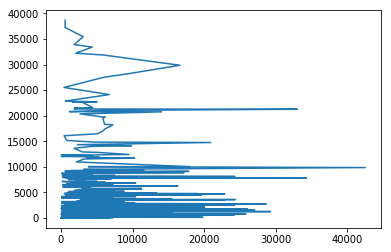

In [81]:
dblp_with_categories['max_year_citations'].value_counts().plot()

In [82]:
dblp_with_categories.to_pickle('dblp_with_categories_final.pickle')

In [83]:
dblp_with_categories

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,title_len,citation_score,normalized_citation_score,SJR_Normalized,reach_normalized,normalized_citation_score_scaled,j-index,fos,max_year_citations,total_year_citations
4125743,0.512331,The technology for building knowledge-based sy...,[John Ross Quinlan],b49c1e2b-0cd0-4950-a724-00c698e5b49d,19320,"[14bf22f7-7122-4a3d-8273-47ac434d75ad, 8683b16...",Induction of Decision Trees,Machine Learning,1986,411.0,...,27,1.000000,0.000013,0.050355,8.974525e-01,0.000013,0.897962,Software,19320,78463
4997861,0.838176,The problem of automatically learning object m...,"[Hiroshi Murase, Shree K. Nayar]",5ebbd1f5-dfe5-4eec-9883-b8b5efea366c,2736,"[60190e83-16e8-4f2c-a068-b63873a01507, 68277b5...",Visual learning and recognition of 3-D objects...,International Journal of Computer Vision,1995,48.0,...,62,0.340722,0.000001,0.166715,8.026407e-01,0.000001,0.804309,Artificial Intelligence,8030,241395
4389283,0.838176,This paper presents a method for extracting di...,[David G. Lowe],b944f77f-113b-4a02-ae5e-d4a124b8fd5b,42508,"[00a4e16f-6b65-4ad2-bedc-b19d9cbc2cfe, 01a0f82...",Distinctive Image Features from Scale-Invarian...,International Journal of Computer Vision,2004,48.0,...,57,1.000000,0.000002,0.166715,7.109341e-01,0.000002,0.712602,Artificial Intelligence,42508,559184
1146912,0.838176,A snake is an energy-minimizing spline guided ...,"[Michael Kass, Andrew P. Witkin, Demetri Terzo...",1c63e1d5-b963-455b-829d-e4f3eb63a36a,21256,"[26be7564-13c5-4650-aa82-5d06540cef84, 2fa2e5b...",Snakes: Active Contour Models,International Journal of Computer Vision,1988,48.0,...,29,1.000000,0.000008,0.166715,6.759192e-01,0.000008,0.677591,Artificial Intelligence,21256,118839
1459562,0.548982,Future users of large data banks must be prote...,[E. F. Codd],e930195e-baa4-4d42-9d5f-e042fcaf5a9e,7295,"[1f016091-9509-4fee-b43b-85552aac7064, 7305e1c...",A relational model of data for large shared da...,Communications of The ACM,1970,398.0,...,54,1.000000,0.000053,0.051369,6.681772e-01,0.000053,0.668717,Computer Science,7295,18959
5076367,0.494403,An object recognition system has been develope...,[David G. Lowe],6018a516-8149-4bce-bc33-5449d86e58c2,15203,"[01a0f825-a308-455b-93fc-e62defc0e3b0, 035f853...",Object recognition from local scale-invariant ...,international conference on computer vision,1999,76.0,...,54,1.000000,0.000007,0.128605,6.654342e-01,0.000007,0.666724,Computer Vision and Pattern Recognition,15203,148352
4193246,0.512331,The support-vector network is a new learning m...,"[Corinna Cortes, Vladimir Vapnik]",50dd56db-151d-4d62-8576-65f0ef6f381b,26114,"[c4dc7b46-01d3-44f5-91ca-0cc063d38c8c, f006e23...",Support-Vector Networks,Machine Learning,1995,411.0,...,23,1.000000,0.000006,0.050355,6.378703e-01,0.000006,0.638377,Software,26114,154454
2254577,0.891586,The extrema in a signal and its first few deri...,[Andrew P. Witkin],2fa2e5ba-11d3-4691-91e1-807b8ef7d8a5,3926,"[0406a1d2-6cfd-470c-8159-bc549cb0da91, 093cf9f...",Scale-space filtering,international joint conference on artificial i...,1983,630.0,...,21,0.669052,0.000014,0.036299,5.272066e-01,0.000014,0.527577,Artificial Intelligence,5868,48241
3507699,0.548982,The concept of one event happening before anot...,[Leslie Lamport],136c4780-2f25-4068-90a5-aed6afaf2890,9521,[],"Time, clocks, and the ordering of events in a ...",Communications of The ACM,1978,398.0,...,64,0.504798,0.000008,0.051369,5.240999e-01,0.000008,0.524618,Computer Science,18861,63136
5021855,0.922867,We present a method to learn and recognize obj...,"[Rob Fergus, Pietro Perona, Andrew Zisserman]",c455fb04-4566-4648-ad6f-3cf2245e507c,2624,"[2d6c9f60-ea78-44a8-b5f9-6964575dd196, 473cf1a...",Object class recognition by unsupervised scale...,computer vision and pattern recognition,2003,2264.0,...,65,0.537375,0.000003,0.013259,5.234812e-01,0.000003,0.523616,Computer Vision and Pattern Recognition,4883,153623


In [85]:
dblp_with_categories.columns.values

array(['best_match_score', 'abstract', 'authors', 'id', 'n_citation',
       'references', 'title', 'venue', 'year', 'Rank', 'Sourceid',
       'Title', 'Type', 'Issn', 'SJR', 'SJR Best Quartile', 'H index',
       'Total Docs. (2017)', 'Total Docs. (3years)', 'Total Refs.',
       'Total Cites (3years)', 'Citable Docs. (3years)',
       'Cites / Doc. (2years)', 'Ref. / Doc.', 'Country', 'Publisher',
       'Categories', 'reach', 'h', 'n', 'num_authors', 'num_ref',
       'abstract_len', 'title_len', 'citation_score',
       'normalized_citation_score', 'SJR_Normalized', 'reach_normalized',
       'normalized_citation_score_scaled', 'j-index', 'fos',
       'max_year_citations', 'total_year_citations'], dtype=object)